<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
C:\Users\niele\AppData\Local\Temp\ipykernel_24020\3648830811.py:48: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Driving frequency ($\omega_d)$'.format(omega_d))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


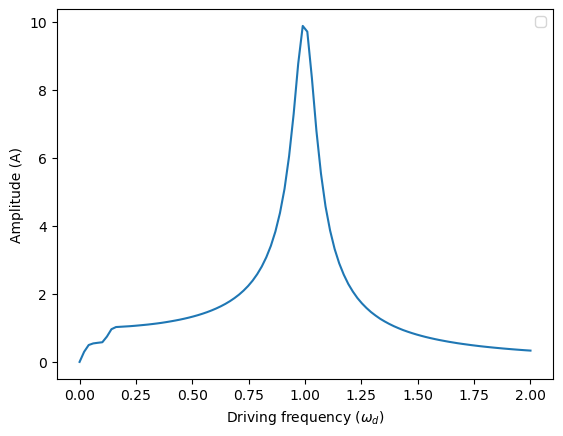

In [34]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Driven, damped harmonic oscillator function
def driven_pendulum(t, y, b, omega0, omega_d, A):
    x, v = y
    dxdt = v
    dvdt = -b * v - (omega0 ** 2) * x + A * np.sin(omega_d * t)
    return [dxdt, dvdt]

def placeholder_amplitudes(tf, n, omega_0, b, y0):
    """
    The code in this function needs to be extracted and incorporated into existing code
    """
    amplitudes = []  # Create empty list to store amplitudes
    t = np.linspace(0.8*tf, tf, n)  # Change time array to include only later points

    driving_freq = np.linspace(0, 2*omega_0, 100)  # Create range of omega_d 20%-200% of omega_0

    # Loop through driving frequencies
    for omega_d in driving_freq:
        # Define the anonymous function, including the changing omegad
        lfun = lambda t, y : driven_pendulum(t, y, b, omega_0, omega_d, A)
        # Call the solver for this definition of lfun
        result = integrate.solve_ivp(fun=lfun,
                                     t_span=(0, tf),
                                     y0=y0,
                                     method="RK45",
                                     t_eval=t)

        # Store result of this run in variables t, x, v
        t = result.t
        x, v = result.y

        amplitudes.append((max(x)-min(x))/2)  # Find peak to peak amplitude
        # End of loop, continue with next omegad
    
    # Out of the loop
    # Plot the amplitudes
    plt.plot(driving_freq, amplitudes)

    # Finalize the plot
    plt.legend()  # Make the plot labels visible
    plt.xlabel('Driving frequency ($\omega_d)$'.format(omega_d))
    plt.ylabel('Amplitude (A)')
    plt.savefig('Oscillator-driven-multi.pdf', bbox_inches='tight')
    plt.show()

# Main parameters for simulation
x0 = 0   # initial position
v0 = 1   # initial velocity
y0 = [x0, v0]  # initial state (position and velocity)
t0 = 0   # initial time

# System properties
b = 0.1    # damping coefficient
omega0 = 1  # natural frequency of the oscillator
A = 1       # amplitude of the driving force
tf = 50*np.pi     # final time for the simulation

n = 1001

placeholder_amplitudes(tf, n, omega0, b, y0)